In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from PIL import Image


In [9]:
import os
import sys 
import configparser
import pandas as pd 
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from matplotlib import cycler
from os.path import join as oj

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import pickle as pkl
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sys.path.insert(0, "../src")

from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import my_data
import unet_model
import models
import seaborn as sns
import pickle as pkl
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [36]:
config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 

In [37]:
img_list = my_data.load_data(data_path)
x, y= my_data.make_rudimentary_dataset(my_data.load_data(data_path),img_size =128,offset=64)
x = x[:, None]

In [38]:
my_data.load_data(data_path)[0].shape

(6, 2048, 2048)

In [39]:
np.unique(y[:,0])

array([0, 1, 2], dtype=uint8)

In [40]:
x.min()

-1.0

In [41]:
img_list = my_data.load_data(data_path)

In [45]:
y.shape

(5400, 128, 128)

In [43]:
background_color = 2
phase_1 = 67
phase_2 = 224

In [46]:
y[300][120,120]

1

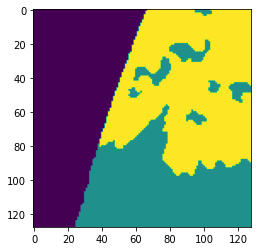

In [47]:
plt.imshow(y[300])

In [16]:
np.unique(img_list[1][2])

array([  2,  67, 224], dtype=uint8)

In [ ]:
zip(img_list)

In [8]:
len(img_list)

4

In [5]:
img_list = my_data.load_data(data_path)
x, y= my_data.make_rudimentary_dataset(my_data.load_data(data_path),img_size =20,offset=50)
x = x[:, None]

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.18, random_state=1)  # 0.25 x 0.8 = 0.2

torch.manual_seed(0)
train_dataset = TensorDataset(
    *[torch.Tensor(input) for input in [X_train, y_train]])
train_loader = DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True)

val_dataset = TensorDataset(
    *[torch.Tensor(input) for input in [
        X_val,
        y_val,
    ]])
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [6]:
input_dim = X_train.shape[
    2]  # Number of input features (e.g. discharge capacity)

model = unet_model.UNet(1, 1, use_small=True).to(device)

optimizer = optim.Adam(model.parameters(), )
loss_function = torch.nn.BCEWithLogitsLoss(reduction='none')
training_loss = []
validation_loss = []

best_val_loss = 500000

cur_patience = 0
max_patience = 5
patience_delta = 0.0
best_weights = None

In [7]:
for batch_idx, (
        input_data,
        y_hat,
) in enumerate(train_loader):
    pass

In [8]:
input_data = input_data.to(device)
y_hat = y_hat.to(device)
optimizer.zero_grad()
y_pred = model(input_data, )

In [9]:
y_hat[:,1] >0

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [10]:
loss = loss_function(y_pred[:, 0], y_hat[:, 0])

In [11]:
 loss

tensor([[[0.8818, 0.8931, 0.8945,  ..., 0.9152, 0.9137, 0.9319],
         [0.8316, 0.8381, 0.8065,  ..., 0.9293, 0.9242, 0.9482],
         [0.8311, 0.8549, 0.8188,  ..., 0.8986, 0.8896, 0.9088],
         ...,
         [0.8231, 0.8554, 0.8518,  ..., 0.8210, 0.8030, 0.7947],
         [0.8476, 0.8822, 0.8952,  ..., 0.8471, 0.8280, 0.8097],
         [0.8833, 0.9222, 0.9886,  ..., 0.9067, 0.8938, 0.8694]],

        [[0.9315, 1.5362, 0.9388,  ..., 0.7417, 1.0328, 0.8899],
         [1.4935, 1.3822, 0.8694,  ..., 0.6973, 0.9628, 0.9492],
         [0.7037, 1.0431, 0.8229,  ..., 1.0526, 0.5761, 0.7477],
         ...,
         [1.2423, 0.6223, 0.6341,  ..., 1.2593, 0.9939, 1.0102],
         [1.0491, 0.7338, 0.8213,  ..., 1.1313, 1.2109, 1.1903],
         [1.0076, 0.7863, 0.8516,  ..., 0.6046, 0.5853, 0.7200]],

        [[0.8818, 0.8931, 0.8945,  ..., 0.9152, 0.9137, 0.9319],
         [0.8316, 0.8381, 0.8065,  ..., 0.9293, 0.9242, 0.9482],
         [0.8311, 0.8549, 0.8188,  ..., 0.8986, 0.8896, 0.

In [12]:
loss_num = torch.masked_select(loss, y_hat[:, 1]>0).mean()

In [ ]:


# loss
loss = loss_function(y_pred[:, 0], y_hat[:, 0])
loss = torch.masked_select(loss, y_hat[:, 1].bool()).mean()

(loss).backward()
tr_loss += loss.item()
optimizer.step()

In [ ]:
model.train()
tr_loss = 0

for batch_idx, (
        input_data,
        y_hat,
) in enumerate(train_loader):

    input_data = input_data.to(device)
    y_hat = y_hat.to(device)
    optimizer.zero_grad()
    y_pred = model(input_data, )

    # loss
    loss = loss_function(y_pred[:, 0], y_hat[:, 0])
    loss = torch.masked_select(loss, y_hat[:, 1].bool()).mean()

    (loss).backward()
    tr_loss += loss.item()
    optimizer.step()

tr_loss /= len(train_loader.dataset)
training_loss.append(tr_loss)

model.eval()
val_loss = 0
val_loss_state = 0
val_loss_lifetime = 0

In [ ]:
y.dtype

In [ ]:
x = ((x.astype(np.int16)-128)/128).max()

In [ ]:
np.unique(y[:,0])

In [ ]:
y.shape

In [ ]:
256/2

In [ ]:
x.max()

In [ ]:
plt.imshow(x[500, ])

In [ ]:
y[500, 1,0,0]

In [ ]:
plt.imshow(y[500, 0])

In [ ]:
plt.imshow(y[5000,0 ])

In [ ]:
model = unet_model.UNet(1, 1, use_small=True).to(device)

In [ ]:
model(torch.Tensor(x[:2, None]).to(device))